<a href="https://colab.research.google.com/github/ramkrishna05/Hotel-booking-data-analysis/blob/main/Copy_of_EDA_Hotel_Bookings_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Hotel Bookings Data Analysis and Visualization.**

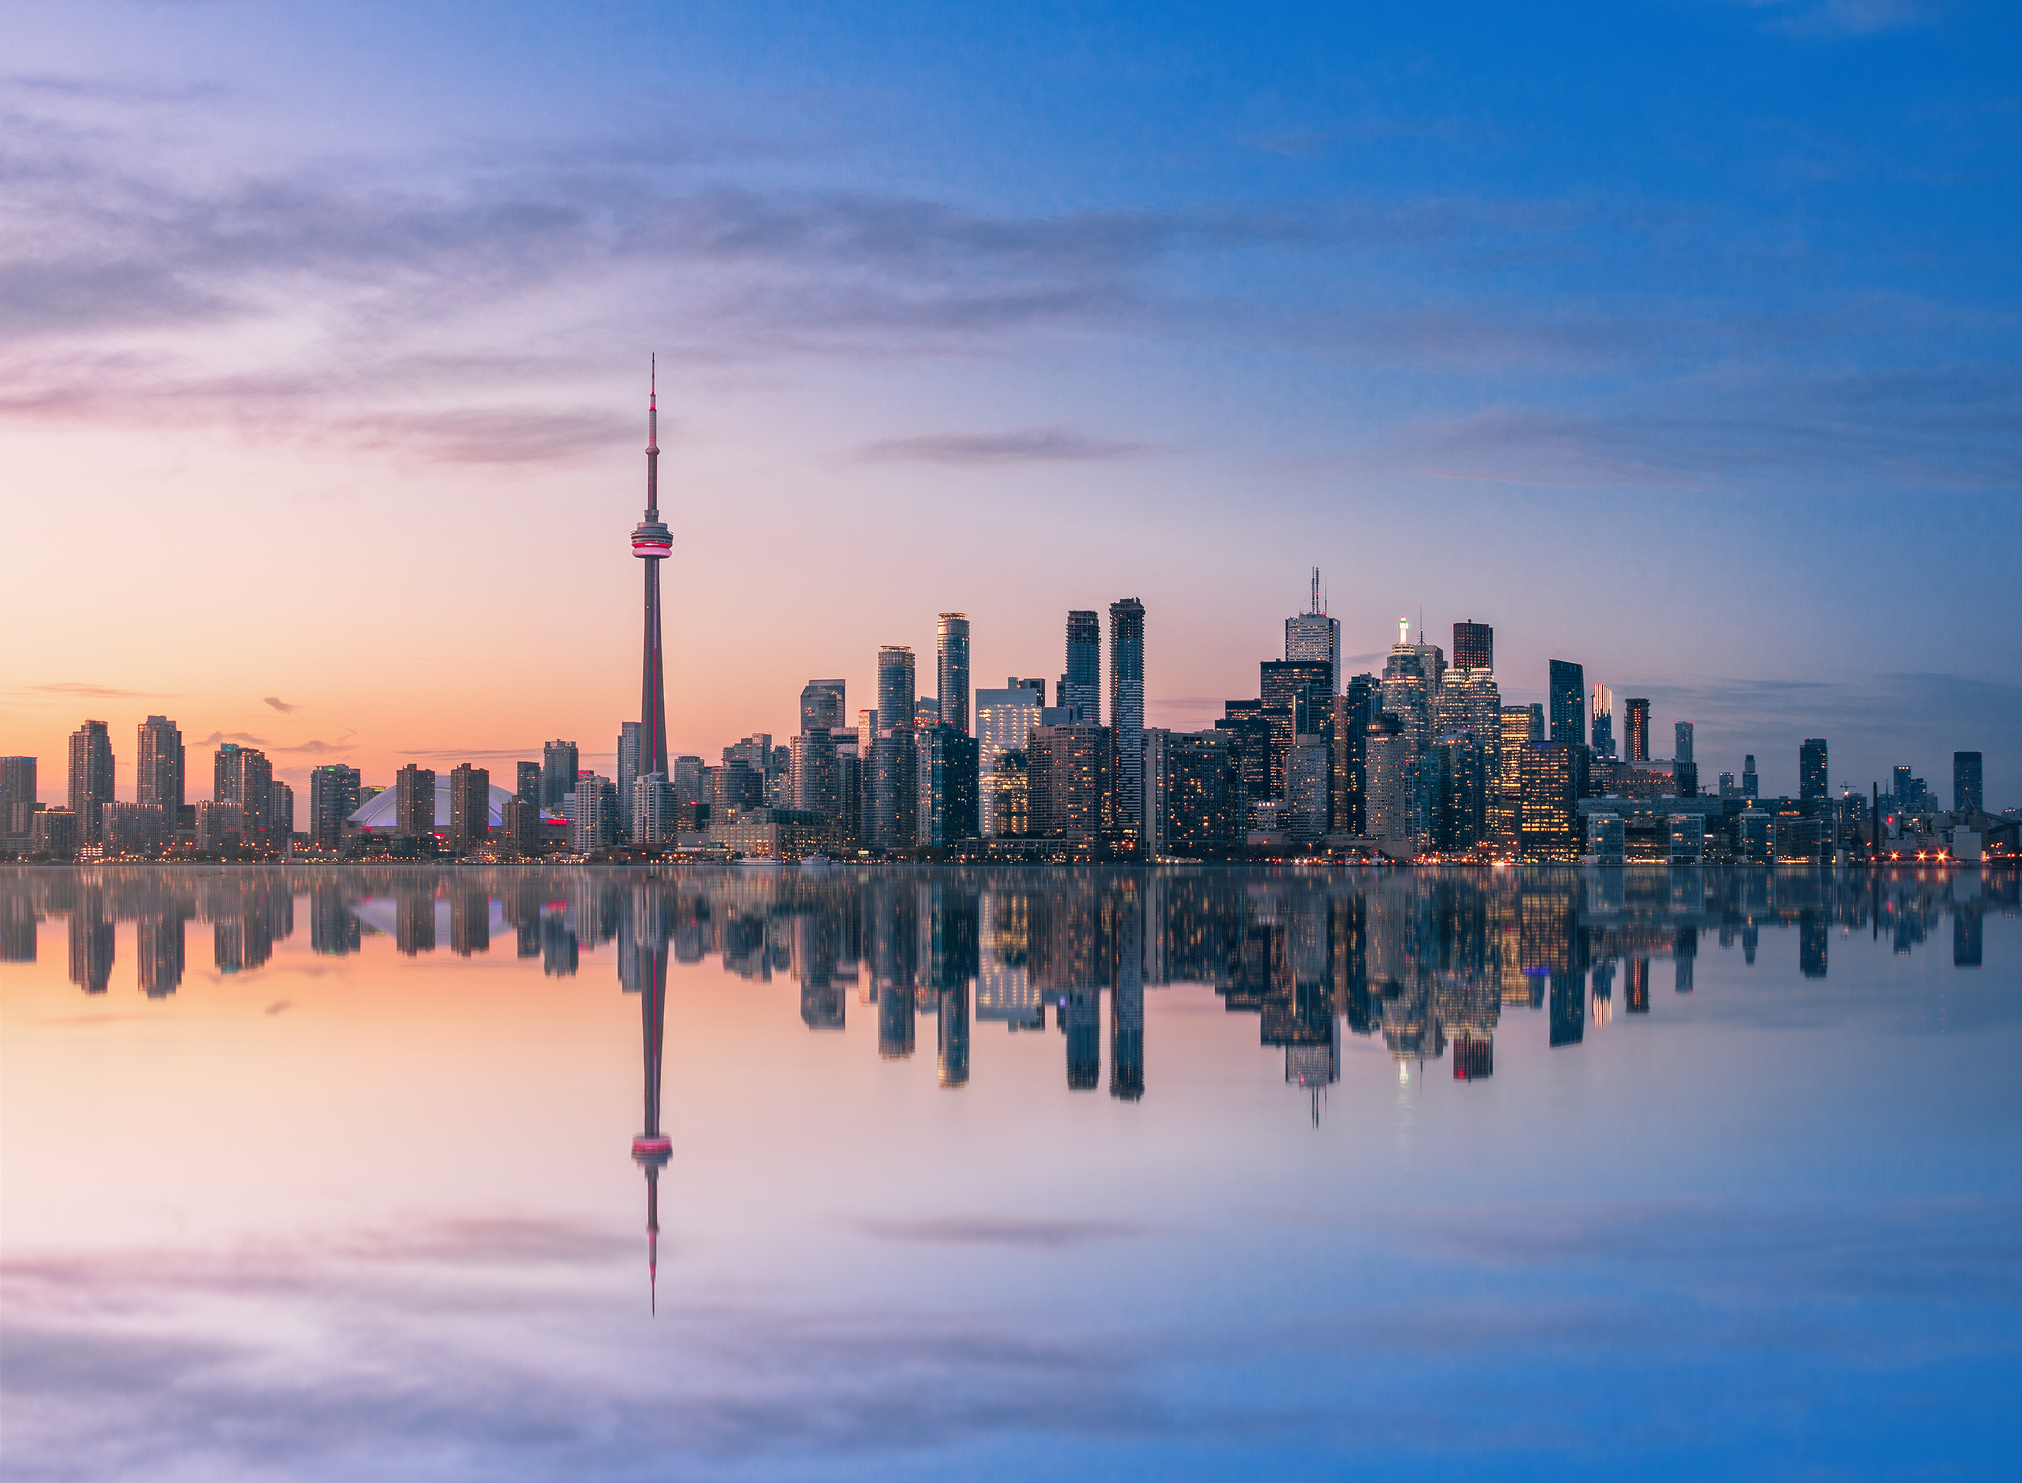

###**Importing required Libraries for analysis.**

In [ ]:
import pandas as pd # for data handling and manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
# magic function to render graphs/charts in notebook
%matplotlib inline  

In [ ]:
#set max columns display limit
pd.set_option("display.max_columns", 40)
#set style for graph
sns.set_style(style='darkgrid')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

###**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#CSV file Location
path = '/content/drive/MyDrive/Copy of Hotel Bookings (1).csv'

###**Reading Data in Notebook**

In [ ]:
#reading csv file 
Hotel_bookings_df = pd.read_csv(path)

###**Exploring Dataset**

In [ ]:
#checking top 5 rows of dataset
Hotel_bookings_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [ ]:
#checking bottom 5 rows of dataset
Hotel_bookings_df.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
119385                       0                               0   
119386                       0                               0   
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119385                  A                  A                0   No Deposit   
119386                  E                  E                0   No Deposit   
119387                  D                  D                0   No Deposit   
119388                  A                  A                0   No Deposit   
119389                  A                  A                0   No Deposit   

        agent  company  days_in_waiting_list customer_type     adr  \
119385  394.0      NaN                     0     Transient   96.14   
119386    9.0      NaN                     0     Transient  225.43   
119387    9.0      NaN                     0     Transient  157.71   
119388   89.0      NaN                     0     Transient  104.40   
119389    9.0      NaN                     0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

       reservation_status reservation_status_date  
119385          Check-Out              2017-09-06  
119386          Check-Out              2017-09-07  
119387          Check-Out              2017-09-07  
119388          Check-Out              2017-09-07  
119389          Check-Out              2017-09-07

In [ ]:
#Now check information about dataset
Hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Inference


1.   There are total of 119390 entries.
2.   Total of 32 columns.
3.   There are Null values in four columns (children, countries, agent, company).

### **Data descrition**


1.   **hotel** : Hotel type.
2.  **is_canceled** : value indicates if the booking is canceled or not.
3. **lead_time** : How long in advance the booking was made.
4. **arrival_date_year** : Customer arrival year.
5. **arrival_date_month** : In which month of the year customer visited hotel.
6. **arrival_date_week_number** : In which week of the year customer arrived.
7. **arrival_date_day_of_month** : Date of the month customer visited hotel.
8. **stays_in_weekend_nights** : Customer stayed or booked to stay in hotel during weekend nights.
9. **stays_in_week_nights** : Customer stayed in hotel during week nights.
10. **adults** : Number of adults
11. **children** : number of children.
12. **babies** : Number of babies.
13. **meal** : Type of meal booked.:
14. **country** : Country of orgin of cutomer.
15. **market_segment** : where the bookings came from.
16. **distribution_channel** : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” .
17. **is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0).
18. **previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking.
19. **previous_bookings_not_canceled** : umber of previous bookings that were cancelled by the customer prior to the current booking.
20. **reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.
21. **assigned_room_type** : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due.
22. **booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS.
23. **deposit_type** : Indication on if the customer made a deposit to guarantee the booking.    
24. **agent** : ID of the travel agency that made the booking.
25. **company** : ID of the company/entity that made the booking or responsible for paying the booking.
26. **days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer. 
27. **customer_type** : Type of booking, assuming one of four categories.   
28. **adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.   
29. **required_car_parking_spaces** : Number of car parking spaces required by the customer.    
30. **total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor).  
31. **reservation_status** : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out: customer check out from hotel,No show: Customer did not check-in hotel and informed hotel with reason.
32. **reservation_status_date** : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking cancelled or when did the customer checked out of the hotel     


In [ ]:
#now check the summary statistics of numerical columns
Hotel_bookings_df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [ ]:
#creating copy of dataset before working with it so that we can have original data untouched
df = Hotel_bookings_df.copy()

In [ ]:
#check the column names 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

###**Check columns and their unique values to understand what they contain.**

In [ ]:
#create categorical column dataframe
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status reservation_status_date  
0     Transient          Check-Out              2015-07-01  
1     Transient          Check-Out              2015-07-01  
2     Transient          Check-Out              2015-07-02  
3     Transient          Check-Out              2015-07-02  
4     Transient          Check-Out              2015-07-03

In [ ]:
#create for loop to print unique values in categorical columns
for col in categorical_columns:
  print(f'Unique values in categorical columns {col} are: {categorical_columns[col].unique()[:8]}')

Unique values in categorical columns hotel are: ['Resort Hotel' 'City Hotel']
Unique values in categorical columns arrival_date_month are: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February']
Unique values in categorical columns meal are: ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in categorical columns country are: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU']
Unique values in categorical columns market_segment are: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in categorical columns distribution_channel are: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in categorical columns reserved_room_type are: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L']
Unique values in categorical columns assigned_room_type are: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B']
Unique values in categorical columns deposit_type are: ['No Deposit' 'Refundable' 'Non Refund']
Unique values in categorical columns custom

## **Data Cleaning**


*   Data cleaning is important step in any EDA process as well as it is most time consuimg process in entire EDA.
*   Data cleaning includes following steps.

  1.   Handling missing values.
  2.   Removing duplicate data.
  3. Converting columns to proper dtype format.
  4. adding or removing some columns for analysis.


### **Step 1: Handling missing values**

In [ ]:
#check null values
df.isnull().sum().sort_values(ascending=False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

##Inference

*   There are four columns which contain null values children has very less null values (4), but in Country, agent and company columns we have lots of null values. We have to find a way to replace those null values with something meaningfull.

As company and agent columns have company number and agent number as data. So there are some cases where customer booked hotel directly without contacting any agent or hotel booking company so we will replace that value with 0, as well as in children column their might be a chance that data has been not been entered so we will replace that too with 0.

In [ ]:
#replace null values of company agent and children with 0
df[['children','company','agent']] = df[['children','company','agent']].fillna(0)

Now in country column we have missing values some people might have not filled data of country from which country they came, So we will replace those null values with 'Not Specified'. 

In [ ]:
#replacing null values in country columns with 'Not Specified'.
df['country'].fillna('Not Specified',inplace=True)

In [ ]:
#Now let's check all the missing values are replaced or there are still any.
df.isnull().sum().sort_values(ascending=False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

Now there are no null values available in our dataset. We can move to next step of data cleaning that is removing duplicates.

### **Step 2: Removing duplicates**

In [ ]:
#let's check shape of our dataset before dropping duplicates
df.shape

(119390, 32)

As we can see True means duplicate data. There are 31994 duplicates rows from total of 119390 rows, let's visualize them using countplot before dropping them.

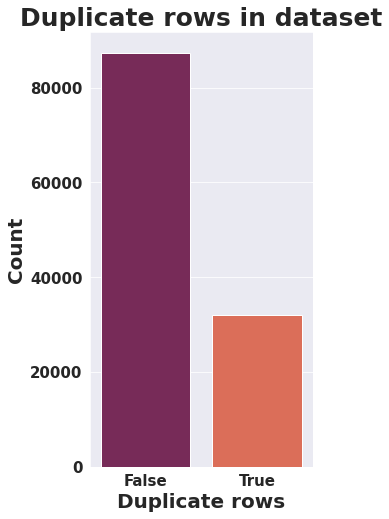

In [ ]:
#duplicate rows visualization
plt.figure(figsize=(4,8))
sns.countplot(x=df.duplicated(),palette='rocket')
plt.xlabel('Duplicate rows')
plt.ylabel('Count')
plt.title('Duplicate rows in dataset');

In [ ]:
#now let's drop duplicate rows and check shape of data after dropping duplicates.
df.drop_duplicates(inplace=True)
df.shape

(87396, 32)

Now our dataset is reduced to 87396 rows from 119390 after dropping duplicates.

### **Step 3: Converting columns to proper dtype and format.**

In [ ]:
#convert dtype of children, agent,company from float64 to int64
df[['children','company','agent']] = df[['children','company','agent']].astype('int64')

In [ ]:
#as reservation_status_date is in object dtype so we will convert it into datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],format = '%Y-%m-%d')

### **Step 4: Adding some columns.**

In [ ]:
#Adding total stay column in dataframe that is (stays_in_week_nights + stays_in_weekend_nights)
df['total_stay'] = df['stays_in_week_nights']+df['stays_in_weekend_nights']

#Adding total people columns that is(adults + children + babies)
df['total_people'] = df['adults'] + df['children'] + df['babies']

In [ ]:
#create dataframe of numerical columns
numerical_df = df._get_numeric_data()
numerical_df.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2         0       0                  0                       0   
1       2         0       0                  0                       0   
2       1         0       0                  0                       0   
3       1         0       0                  0                       0   
4       2         0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent  company  \
0                               0                3      0        0   
1                               0                4      0        0   
2                               0                0      0        0   
3                               0                0    304        0   
4                               0                0    240        0   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  total_stay  total_people  
0                          0           0             2  
1                          0           0             2  
2                          0           1             1  
3                          0           1             1  
4                          1           2             2

In [ ]:
#create for loop to print unique values in numerical columns

for col in numerical_df:
  print(f'Unique values in numerical columns {col} are: {numerical_df[col].unique()[:5]}')

Unique values in numerical columns is_canceled are: [0 1]
Unique values in numerical columns lead_time are: [342 737   7  13  14]
Unique values in numerical columns arrival_date_year are: [2015 2016 2017]
Unique values in numerical columns arrival_date_week_number are: [27 28 29 30 31]
Unique values in numerical columns arrival_date_day_of_month are: [1 2 3 4 5]
Unique values in numerical columns stays_in_weekend_nights are: [0 1 2 4 3]
Unique values in numerical columns stays_in_week_nights are: [0 1 2 3 4]
Unique values in numerical columns adults are: [ 2  1  3  4 40]
Unique values in numerical columns children are: [ 0  1  2 10  3]
Unique values in numerical columns babies are: [ 0  1  2 10  9]
Unique values in numerical columns is_repeated_guest are: [0 1]
Unique values in numerical columns previous_cancellations are: [ 0  1  2  3 26]
Unique values in numerical columns previous_bookings_not_canceled are: [0 1 2 3 4]
Unique values in numerical columns booking_changes are: [3 4 0 1 

## **Exploratory Data Analysis.**

Let's check the correlation between numerical data and create a heatmap.

In [ ]:
#create correlation matrix
numerical_df.corr()

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.184806           0.088030   
lead_time                          0.184806   1.000000           0.139135   
arrival_date_year                  0.088030   0.139135           1.000000   
arrival_date_week_number           0.001443   0.101150          -0.514228   
arrival_date_day_of_month          0.005328   0.009866          -0.010023   
stays_in_weekend_nights            0.060191   0.235145           0.005144   
stays_in_week_nights               0.082928   0.310129           0.003645   
adults                             0.081816   0.140493           0.038619   
children                           0.067369   0.028650           0.041158   
babies                            -0.020543  -0.003614          -0.023334   
is_repeated_guest                 -0.089643  -0.147003           0.024343   
previous_cancellations             0.051468   0.005375          -0.054212   
previous_bookings_not_canceled    -0.052154  -0.078931           0.027256   
booking_changes                   -0.093644   0.077028           0.008604   
agent                             -0.000900   0.080448          -0.001891   
company                           -0.074758  -0.079176           0.021269   
days_in_waiting_list               0.004464   0.132152          -0.027939   
adr                                0.127986   0.023564           0.176088   
required_car_parking_spaces       -0.184206  -0.086541          -0.039807   
total_of_special_requests         -0.120545   0.034240           0.064268   
total_stay                         0.084102   0.318272           0.004630   
total_people                       0.100257   0.126736           0.050744   

                                arrival_date_week_number  \
is_canceled                                     0.001443   
lead_time                                       0.101150   
arrival_date_year                              -0.514228   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.093594   
stays_in_weekend_nights                         0.026868   
stays_in_week_nights                            0.027801   
adults                                          0.024362   
children                                        0.013450   
babies                                          0.014260   
is_repeated_guest                              -0.036860   
previous_cancellations                          0.007199   
previous_bookings_not_canceled                 -0.020819   
booking_changes                                 0.011902   
agent                                           0.019594   
company                                        -0.022627   
days_in_waiting_list                            0.013843   
adr                                             0.098279   
required_car_parking_spaces                     0.008946   
total_of_special_requests                       0.046599   
total_stay                                      0.030693   
total_people                                    0.028973   

                                arrival_date_day_of_month  \
is_canceled                                      0.005328   
lead_time                                        0.009866   
arrival_date_year                               -0.010023   
arrival_date_week_number                         0.093594   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.017803   
stays_in_week_nights                            -0.028190   
adults                                          -0.001125   
children                                         0.015821   
babies                                          -0.000393   
is_repeated_guest                               -0.004178   
previous_cancellations                          -0.008538   
previous_bookings_not_canceled                   0.000152   
booking_changes          

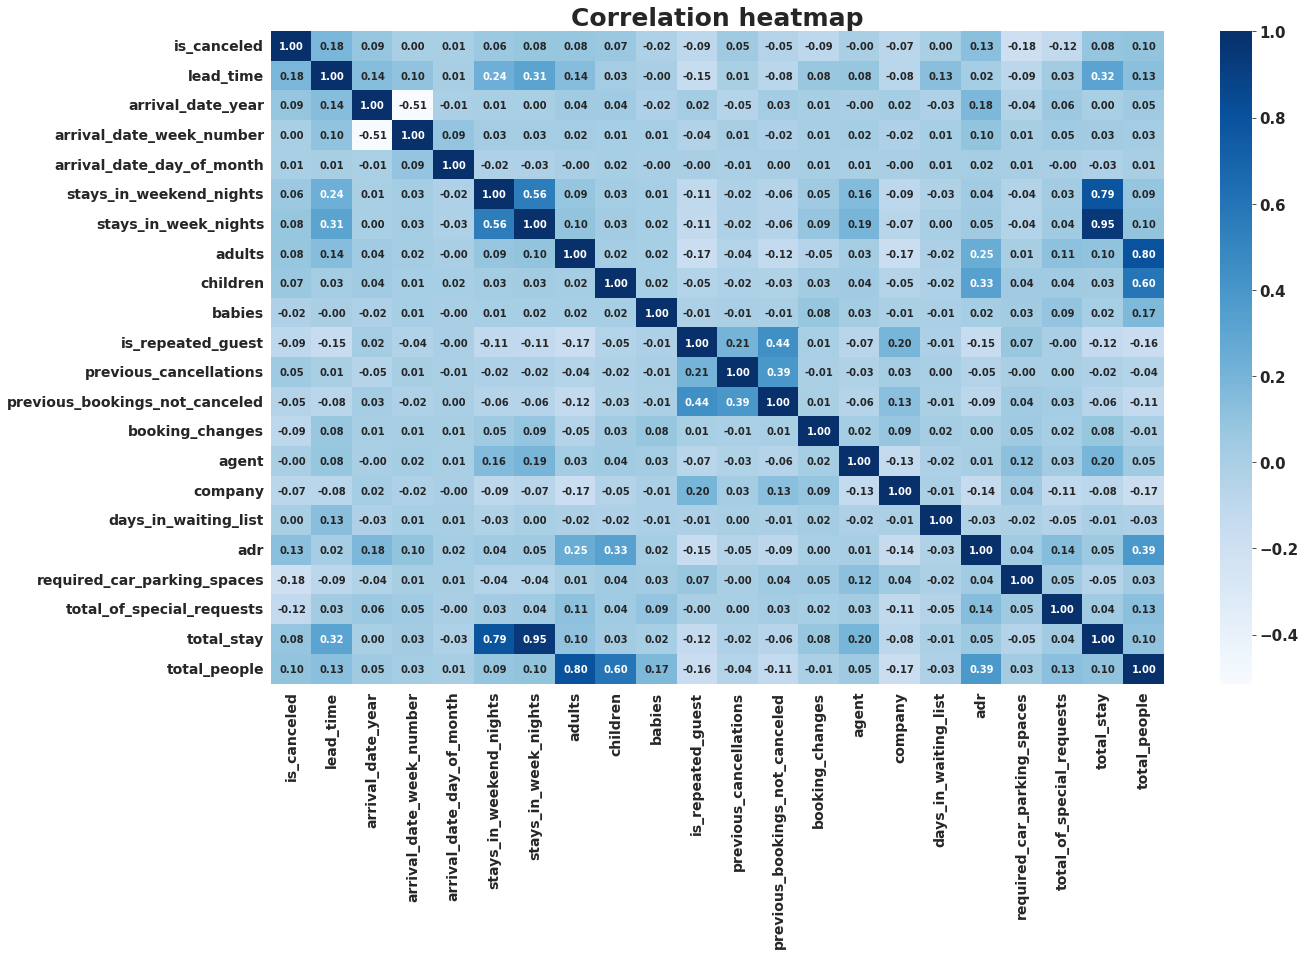

In [ ]:
#create heatmap of above correlation matrix so that it is easy to read and understand.
plt.figure(figsize=(20,12))
sns.heatmap(numerical_df.corr(),annot=True,fmt = '.2f',cmap='Blues')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation heatmap');

### Inferences


*   Total_stay and lead time have slight correlation it. This might means that customer plan reservation before their actual arrival.
*  Adr(Average Daily Rate) is slightly correlated with total people, which makes sense as more number of people means more revenue.
* Previous booking not cancelled and repeated guest have high correlation as repeated guest are most likely to be who has not cancelled their previous bookings.
* We can also see that some columns have high correlation between them for example total people with adult and children it is because as those column are dervied from them by addition.

### 1) which type of hotels are most preferred by customer?

In [ ]:
df['hotel'].value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

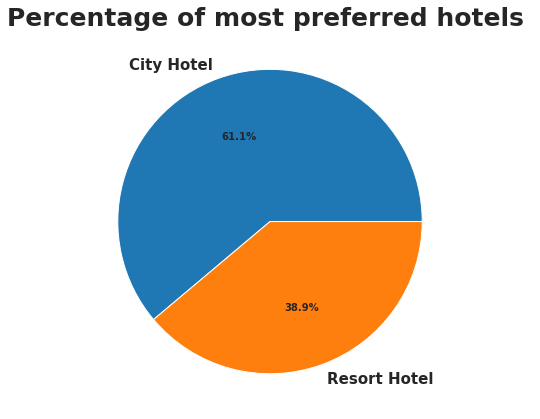

In [ ]:
#visualize most preferred hotels
plt.figure(figsize=(7,7))
plt.pie(df['hotel'].value_counts(),labels = df['hotel'].value_counts().keys(),autopct = '%0.1f%%')
plt.title('Percentage of most preferred hotels ');

## Inference

*   City hotels are more preferred by guest as city hotels are mostly near by Airports, Railway stations
* Resort are situated at longer distance.

### 2) Which agent has made most bookings?

In [ ]:
#booking made by agents
booking_agents = df['agent'].value_counts().reset_index().rename(columns ={'index':'agent','agent':'Most_bookings'})

#as 0 was null value we replaced it with 0 so we are dropping them as no agent was involved in those bookings.
booking_agents.drop(booking_agents[booking_agents['agent']==0].index,inplace=True)

#top 10 booking agents
top_10_agents = booking_agents[:10]
top_10_agents

agent  Most_bookings
0       9          28759
1     240          13028
3      14           3349
4       7           3300
5     250           2779
6     241           1644
7      28           1502
8       8           1383
9       1           1232
10      6           1117

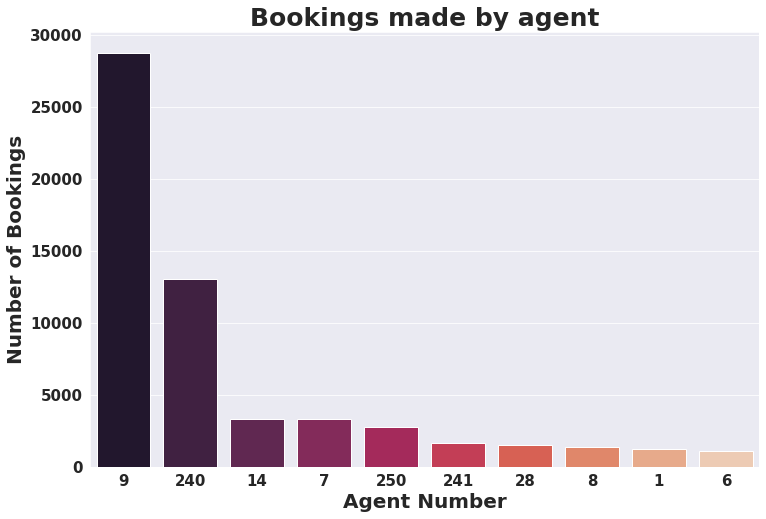

In [ ]:
#Visualize top 10 agents who made hotel bookings
plt.figure(figsize=(12,8))
sns.barplot(x = top_10_agents['agent'], y = top_10_agents['Most_bookings'],order = top_10_agents['agent'],palette='rocket')
plt.xlabel('Agent Number')
plt.ylabel('Number of Bookings')
plt.title('Bookings made by agent');

## Inference


*   Id Number 9 agent has made most numbers of bookings 28759.
* Id Number 240 has most number of bookings after ID 9 followed by 14 and 7.


## 3) What is the percentage of booking cancellation?

In [ ]:
#check how many bookings were cancelled
df['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

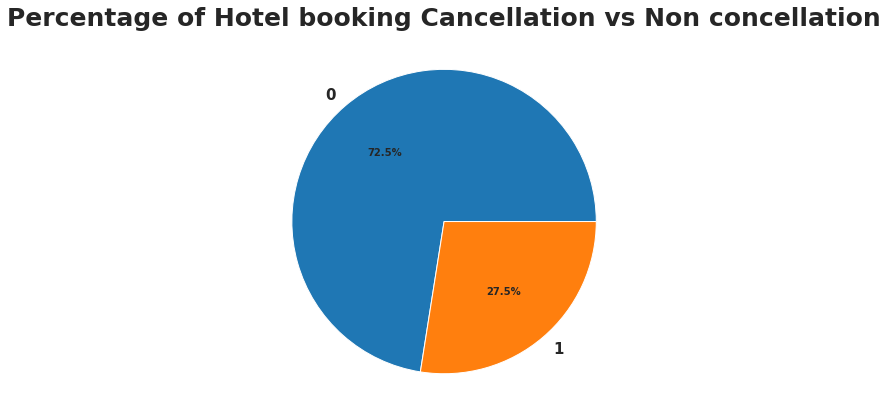

In [ ]:
#visualize cancellation rate
plt.figure(figsize=(7,7))
plt.pie(df['is_canceled'].value_counts(),labels=df['is_canceled'].value_counts().keys(),autopct = '%0.1f%%')
plt.title('Percentage of Hotel booking Cancellation vs Non concellation');

## Inference


*   0 means not cancelled and 1 is cancelled.
*   27.5 % bookings were cancelled.


## 4) Does longer waiting period causes booking cancellation?

In [ ]:
#create data frame where days of waiting is more than zero
waiting_list = df[df['days_in_waiting_list']!=0]
waiting_list.head()

hotel  is_canceled  lead_time  arrival_date_year  \
2272  Resort Hotel            0         59               2015   
2486  Resort Hotel            0         47               2015   
2508  Resort Hotel            0         47               2015   
3106  Resort Hotel            0        105               2015   
3118  Resort Hotel            0        105               2015   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
2272            October                        41                          8   
2486            October                        43                         19   
2508            October                        43                         19   
3106           November                        47                         18   
3118           November                        47                         18   

      stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2272                        0                     3       2         0       0   
2486                        1                     4       2         0       0   
2508                        1                     4       2         0       0   
3106                        2                     4       2         0       0   
3118                        2                     4       2         0       0   

           meal country market_segment distribution_channel  \
2272         BB     PRT      Corporate            Corporate   
2486         HB     ESP         Groups               Direct   
2508         HB     PRT         Groups               Direct   
3106  Undefined     ESP  Offline TA/TO                TA/TO   
3118  Undefined     PRT  Offline TA/TO                TA/TO   

      is_repeated_guest  previous_cancellations  \
2272                  0                       0   
2486                  0                       0   
2508                  0                       0   
3106                  0                       0   
3118                  0                       0   

      previous_bookings_not_canceled reserved_room_type assigned_room_type  \
2272                               0                  A                  A   
2486                               0                  A                  A   
2508                               0                  A                  A   
3106                               0                  A                  A   
3118                               0                  A                  A   

      booking_changes deposit_type  agent  company  days_in_waiting_list  \
2272                0   No Deposit    281        0                    50   
2486                0   No Deposit      0        0                    47   
2508                0   No Deposit      0        0                    47   
3106                0   No Deposit    313        0                    65   
3118                1   No Deposit    313        0                    65   

        customer_type   adr  required_car_parking_spaces  \
2272         Contract  45.0                            0   
2486  Transient-Party  76.8                            0   
2508  Transient-Party  76.8                            0   
3106  Transient-Party  69.0                            0   
3118  Transient-Party  71.0                            0   

      total_of_special_requests reservation_status reservation_status_date  \
2272                          0          Check-Out              2015-10-11   
2486                          0          Check-Out              2015-10-24   
2508                          0          Check-Out              2015-10-24   
3106                          0          Check-Out              2015-11-24   
3118                          0          Check-Out              2015-11-24   

      total_stay  total_people  
2272           3             2  
2486           5             2  
2508           5             2  
3106           6             2  
3118           6             2

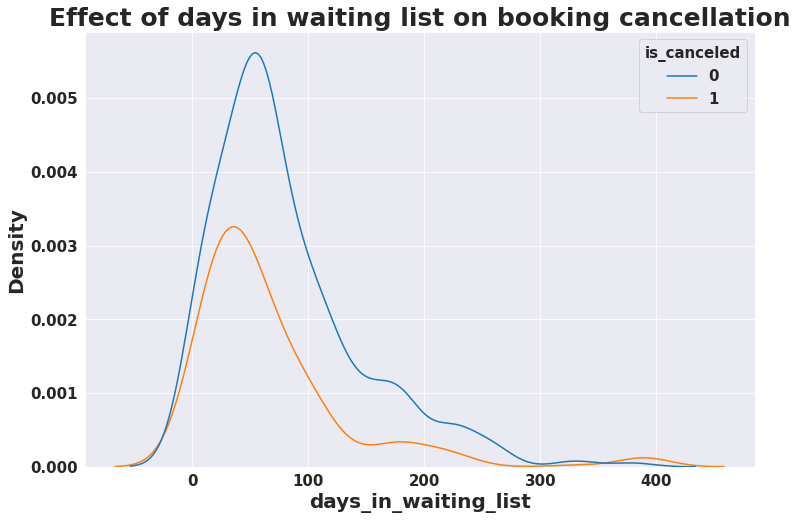

In [ ]:
#visualize effect of days in waiting list on booking cancellation
plt.figure(figsize=(12,8))
sns.kdeplot(x='days_in_waiting_list',hue='is_canceled',data=waiting_list)
plt.title('Effect of days in waiting list on booking cancellation');

## Inference

*   We can see that most bookings were cancelled which has less than 100 days in waiting list but also bookings were not cancelled for the same still density of cancelled is slightly higher for the same but there is no direct effect of longer waiting period with booking cancellation.

## 5) Does not getting same room type as demanded causes cancellation?

In [ ]:
# create a function to check that guest demanded room type is same as alloted.
def room_type_allotment(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0
#now apply function and check count of cancellation if same room not alloted
same_room_not_alloted = df.apply(lambda x : room_type_allotment(x), axis = 1)
same_room_not_alloted.value_counts()
  

0    74287
1    13109
dtype: int64

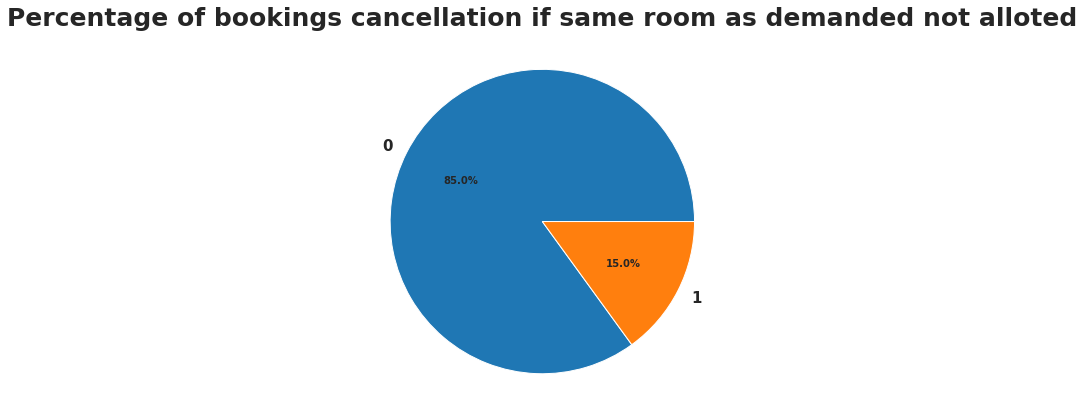

In [ ]:
#visualize % of booking cancellation if same room as demanded not alloted

plt.figure(figsize=(7,7))
plt.pie(same_room_not_alloted.value_counts(),labels= same_room_not_alloted.value_counts().keys(),autopct='%0.1f%%')
plt.title('Percentage of bookings cancellation if same room as demanded not alloted');

## Inference

*   Only 15 % of bookings were cancelled if not alloted same room type as demanded.



# Let's check some time related question that is year, month, etc.

## 6) Which year has the highest bookings?

In [ ]:
#check which year has highest bookings
df['arrival_date_year'].value_counts()

2016    42391
2017    31692
2015    13313
Name: arrival_date_year, dtype: int64

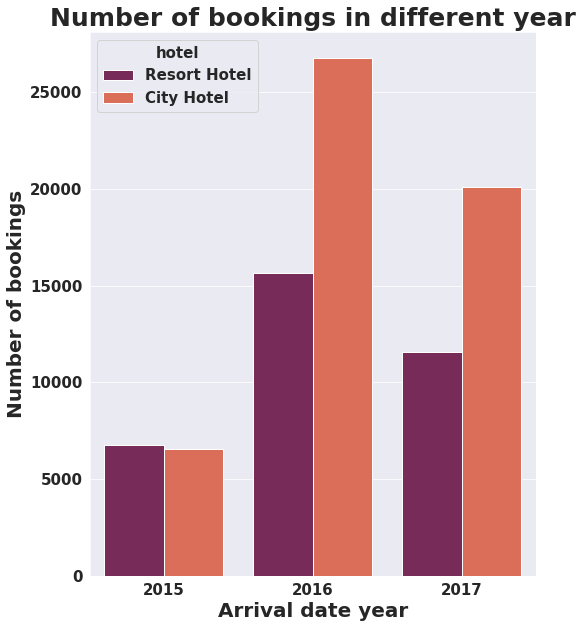

In [ ]:
#Plotting bookinngs in different years
plt.figure(figsize=(8,10))
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'],palette='rocket')
plt.xlabel('Arrival date year')
plt.ylabel('Number of bookings')
plt.title('Number of bookings in different year');

## Inference


*   year 2016 has the highest number of bookings (42391) followed by 2017  (31692) and 2015 (13313). It means 2016 and 2017 was a very good year for hotel industry and In 2016 and 2017 more booking was in city hotels and in 2015 it is slighlty lower than resort hotel.


## 7) Which month has the highest number of bookings overall?

In [ ]:
#check month wise bookings
df['arrival_date_month'].value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

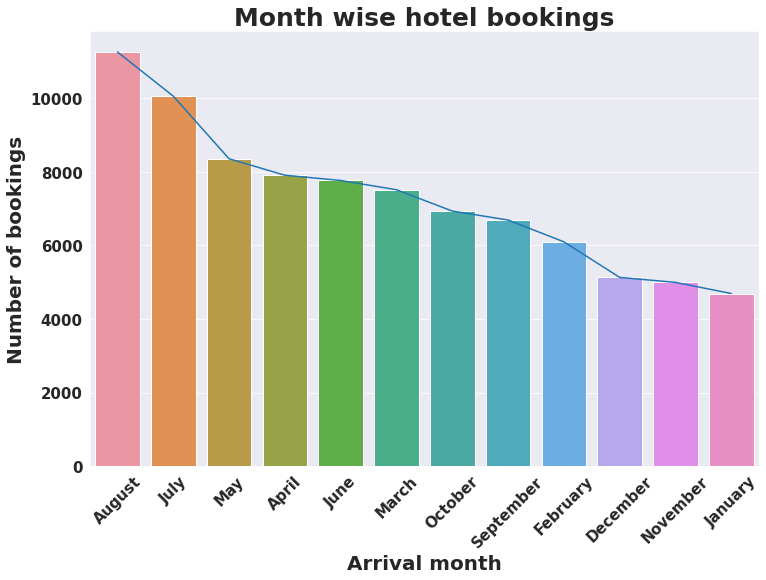

In [ ]:
#Plot month wise Hotel bookings
plt.figure(figsize=(12,8))
sns.lineplot(x=df['arrival_date_month'].value_counts().keys(),y=df['arrival_date_month'].value_counts())
sns.barplot(x=df['arrival_date_month'].value_counts().keys(),y=df['arrival_date_month'].value_counts())
plt.xticks(rotation=45)
plt.xlabel('Arrival month')
plt.ylabel('Number of bookings')
plt.title('Month wise hotel bookings');

## Inference


*   It seems that august has the highest number of bookings followed by july and may and least bookings are in november and january.


## 8) which date day of month has the highest number of booking overall?

In [ ]:
#check date day of months wise booking
df['arrival_date_day_of_month'].value_counts()

17    3020
2     3016
26    3000
5     2980
16    2959
19    2949
12    2929
28    2929
18    2924
11    2915
20    2915
27    2902
29    2880
9     2878
15    2869
25    2838
3     2834
21    2823
13    2812
8     2809
6     2805
4     2801
10    2785
23    2776
24    2775
30    2772
1     2770
7     2704
14    2693
22    2601
31    1733
Name: arrival_date_day_of_month, dtype: int64

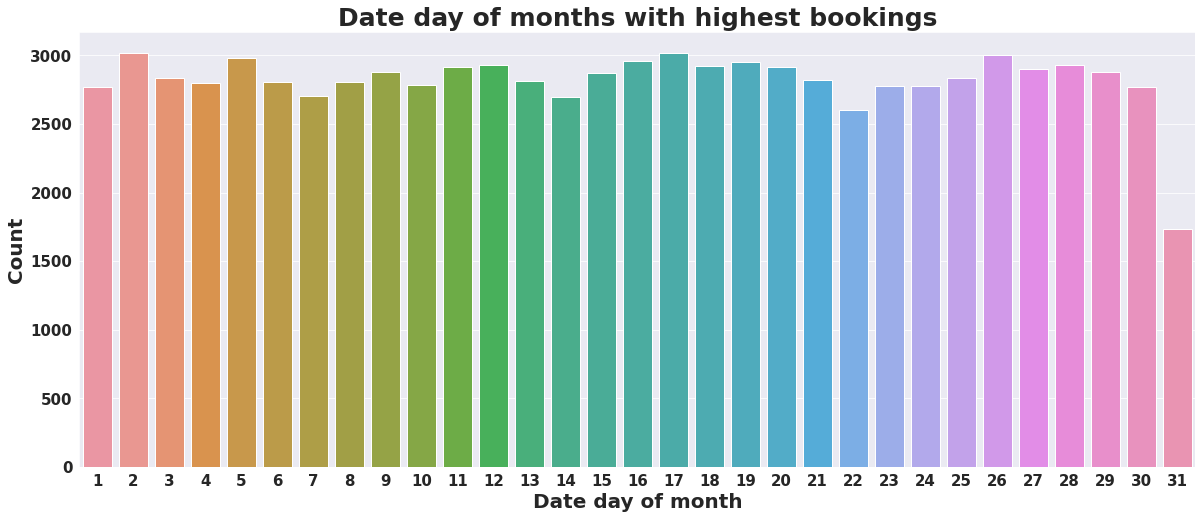

In [ ]:
#plot which date day of months has the highest bookings
plt.figure(figsize=(20,8))
sns.barplot(x=df['arrival_date_day_of_month'].value_counts().keys(),y=df['arrival_date_day_of_month'].value_counts())
plt.xlabel('Date day of month')
plt.ylabel('Count')
plt.title('Date day of months with highest bookings');

## Inference


*   We can see that the bookings are equally distributed amongs date day of month and only less numbers of bookings are on date 31.


## 9) What is the percentage of repeated guest?

In [ ]:
#check repeate guest
df['is_repeated_guest'].value_counts()

0    83981
1     3415
Name: is_repeated_guest, dtype: int64

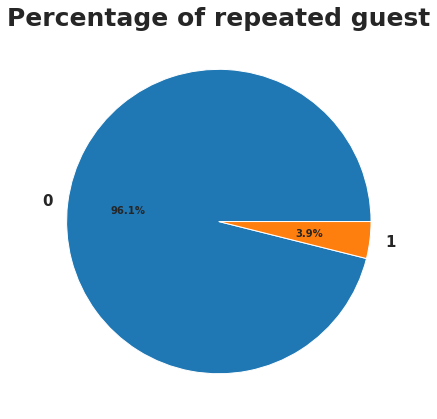

In [ ]:
#plot percentage of repeated guest
plt.figure(figsize=(7,7))
plt.pie(df['is_repeated_guest'].value_counts(),labels=df['is_repeated_guest'].value_counts().keys(), autopct = '%0.1f%%')
plt.title('Percentage of repeated guest');

## Inference


*   It seems that only 3.9% guests are repeated.

## 10) What is the percentage distribution of customer type?

In [ ]:
#check distribution of customer type
df['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

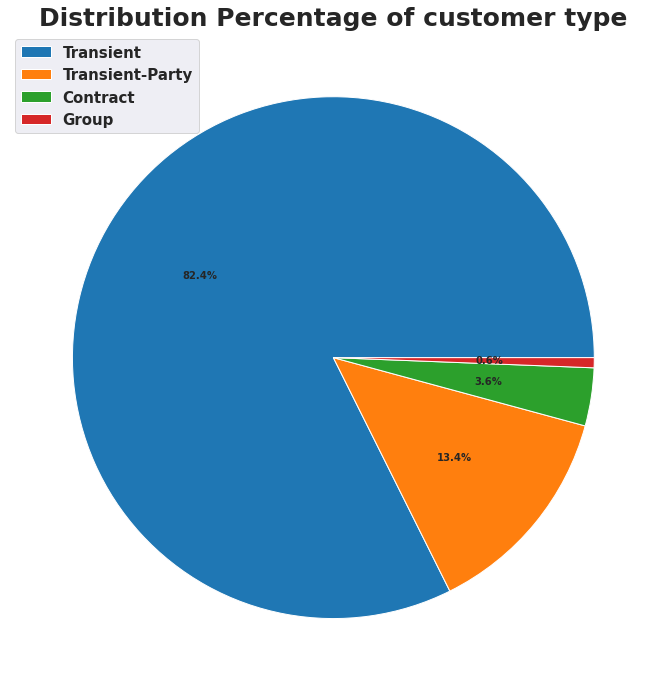

In [ ]:
#plot distribution percentage of customer type
plt.figure(figsize=(12,12))
plt.pie(df['customer_type'].value_counts(),labels=None,autopct='%0.1f%%')
plt.title('Distribution Percentage of customer type')
legend = list(df['customer_type'].value_counts().keys())
plt.legend(legend,loc='upper left');

*   **Contract**:
when the booking has an allotment or other type of contract associated to it.
* **Group**:
when the booking is associated to a group.
* **Transient**:
when the booking is not part of a group or contract,amongs non-group category are transient.
* **Transient-party**:
when the booking is transient, but it is associated to at least other transient booking.

## Inference

*   Transient has the highest distribution percentage of customer type (82.4%) and least 0.6% associated with Group customer type.


## 11) What is the percentage distribution of car parking space required?

In [ ]:
#check distribution fo car parking space
df['required_car_parking_spaces'].value_counts()

0    80083
1     7280
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

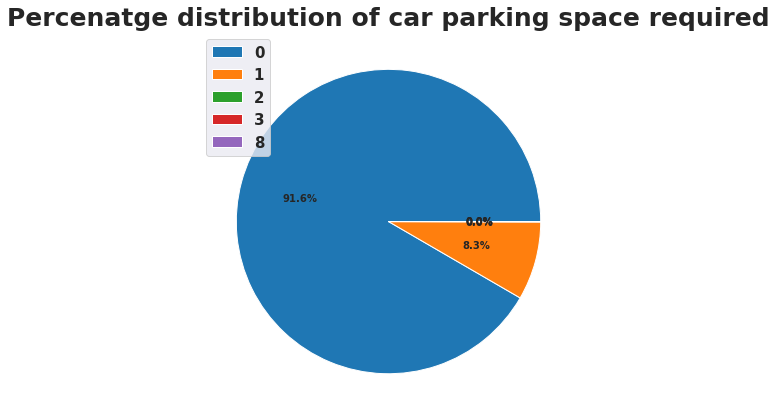

In [ ]:
#plot the distribution of required car parking space
plt.figure(figsize=(7,7))
plt.pie(df['required_car_parking_spaces'].value_counts(),labels = None,autopct='%0.1f%%')
legend = df['required_car_parking_spaces'].value_counts().keys()
plt.title('Percenatge distribution of car parking space required')
plt.legend(legend, loc = 'upper left');

## Inference


*   91.6 % guests did not required car parking space. Only 8.3 % guests required 1 car parking space and after that it is very negligible.


## 12) What is the Percentage distribution of deposit type?

In [ ]:
#check distribution of deposit type
df['deposit_type'].value_counts()

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

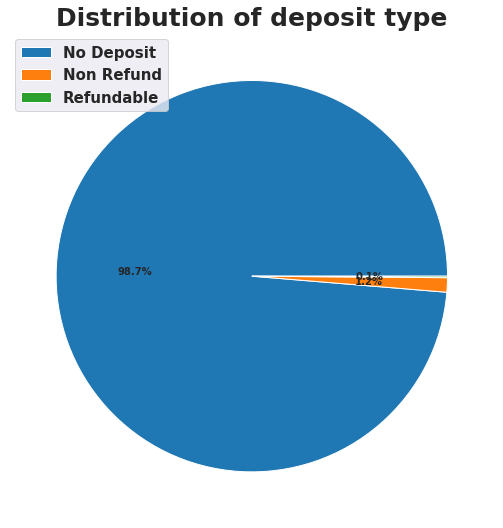

In [ ]:
#plot distribution of deposit type
plt.figure(figsize=(9,9))
plt.pie(df['deposit_type'].value_counts(),labels=None, autopct = '%0.1f%%')
legend = df['deposit_type'].value_counts().keys()
plt.title('Distribution of deposit type')
plt.legend(legend,loc = 'upper left');

## Inference

*   Around 98.7% booking required no deposit and 1.2 % has no refund and only 0.1% has refundable.



## 13) Which type of food is mostly preferred by the guests?


In [ ]:
#check food preference
df['meal'].value_counts()

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

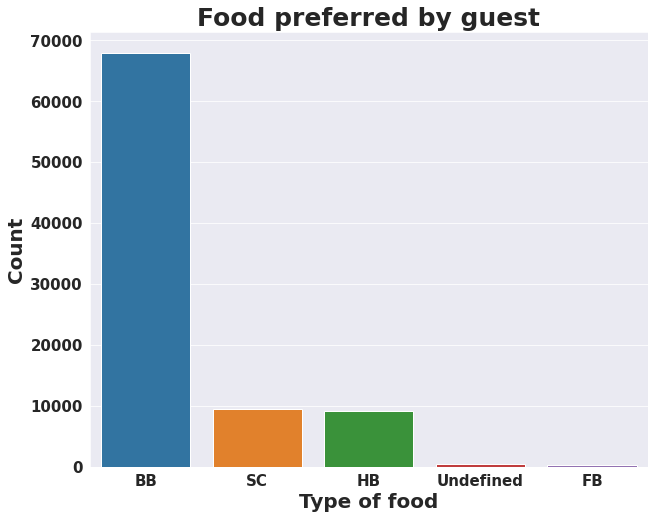

In [ ]:
#plot meal preference
plt.figure(figsize=(10,8))
sns.barplot(x=df['meal'].value_counts().keys(),y=df['meal'].value_counts())
plt.xlabel('Type of food')
plt.ylabel('Count')
plt.title('Food preferred by guest');

Types of meal in hotels:
* BB - (Bed and Breakfast)
* HB- (Half Board)
* FB- (Full Board)
* SC- (Self Catering)

## Inference

*   Most preferred meal type by the guest is BB (Bed and Breakfast).
* SC and HB are equally preferred, undefined and Fb are very less.


## 14) Which distribution channel is mostly used for hotel bookings?

In [ ]:
 #check distribution channel
dcf =df['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})
#add percenatge columns in dcf dataframe
dcf['percentage'] = round(dcf['count']*100/df.shape[0],1)
#Creating list of percentage
sizes=dcf['percentage'].values.tolist()

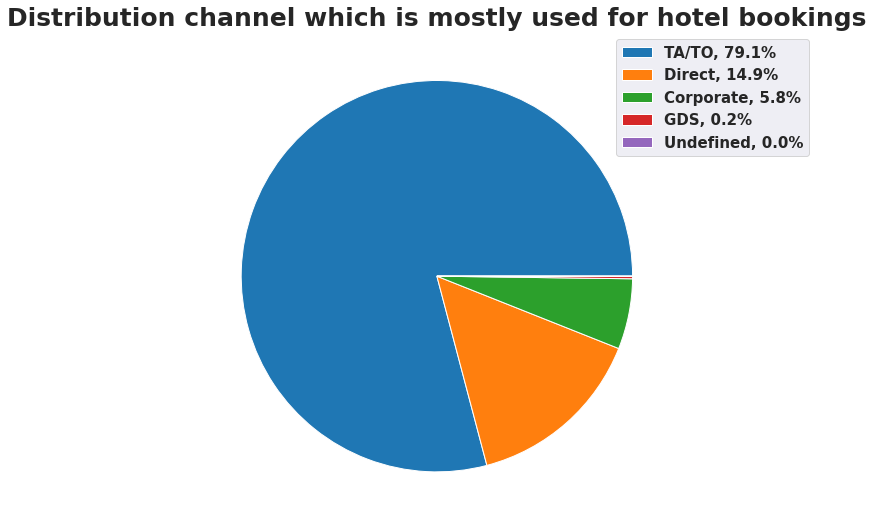

In [ ]:
#plot distribution channel which is mostly used for hotel bookings
plt.figure(figsize=(9,9))
plt.pie(df['distribution_channel'].value_counts(),labels=None)

#setting legends with percentage values
labels = df['distribution_channel'].value_counts().keys()
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

plt.title('Distribution channel which is mostly used for hotel bookings');

## Inference

*   TA/TO is mostly used for booking hotels followed by Direct.

## 15) What is the distribution of booking changes made by guests?

In [ ]:
#check booking changes made buy guests
booking_changes_df=df['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})
booking_changes_df

number_booking_changes  Counts
0                        0   71494
1                        1   10902
2                        2    3508
3                        3     875
4                        4     356
5                        5     116
6                        6      59
7                        7      31
8                        8      17
9                        9       8
10                      10       6
11                      13       5
12                      14       5
13                      15       3
14                      16       2
15                      17       2
16                      12       2
17                      11       2
18                      20       1
19                      21       1
20                      18       1

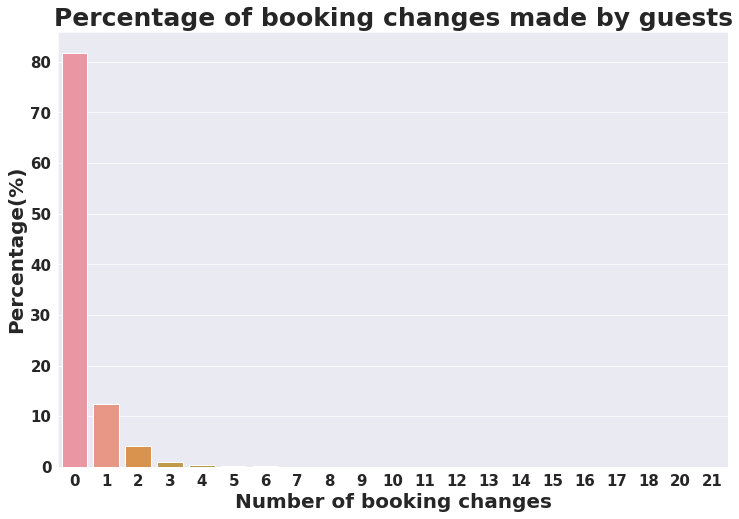

In [ ]:
#plot percentage of booking changes made by guest
plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df.shape[0])
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking changes made by guests");

## Inference

*   More than 82% of bookings were not changed.
* Around 12% of guest changed 1 booking and less than 5% has made 2.


## 16) Which is the most reserved room type by customer?

In [ ]:
#Check room type reserved by customer
df['reserved_room_type'].value_counts()

A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

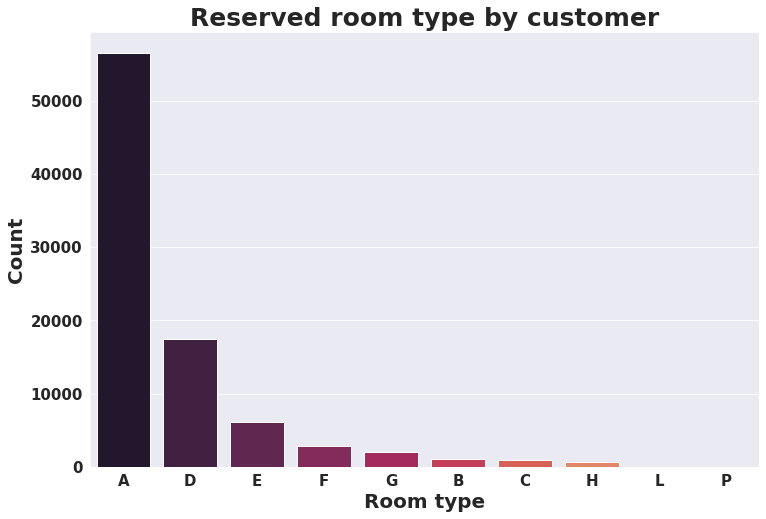

In [ ]:
#plot reserved room type by customers
plt.figure(figsize=(12,8))
sns.barplot(x=df['reserved_room_type'].value_counts().keys(),y=df['reserved_room_type'].value_counts(),palette='rocket')
plt.xlabel('Room type')
plt.ylabel('Count')
plt.title('Reserved room type by customer');

## Inference

*   Most reserved room type is A.
*   Least preferred are L and P.


## 17) From which country the most guests are coming?

In [ ]:
#check top 10 country wise distribution of guests
df['country'].value_counts()[:10]

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: country, dtype: int64

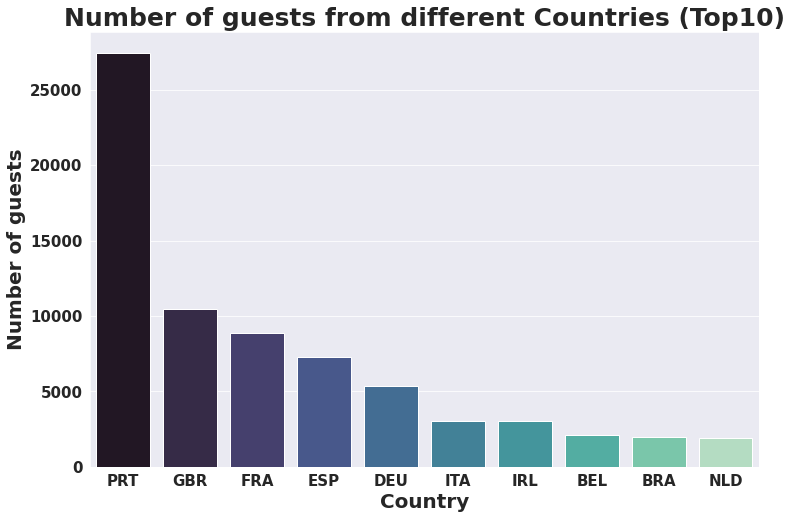

In [ ]:
#plot top 10 countries where most number of guests are coming
plt.figure(figsize=(12,8))
sns.barplot(x=df['country'].value_counts().keys()[:10],y=df['country'].value_counts()[:10],palette = 'mako')
plt.xlabel('Country')
plt.ylabel('Number of guests')
plt.title('Number of guests from different Countries (Top10)');

Abbreviation for countries-

PRT- Portugal,
GBR- United Kingdom,
FRA- France,
ESP- Spain,
DEU - Germany,
ITA -Itlay,
IRL - Ireland,
BEL -Belgium,
BRA -Brazil,
NLD-Netherlands

## Inference


*   Most number of guests are coming from portugal more than 27000 may be the hotels are situated in Portugal.


## 18) Which hotel type has the highest ADR?

In [ ]:
#first group by hotel
group_by_hotel = df.groupby('hotel')

In [ ]:
#check ADR of hotel
Highest_ADR = group_by_hotel['adr'].mean().reset_index()
Highest_ADR

hotel         adr
0    City Hotel  110.985944
1  Resort Hotel   99.025346

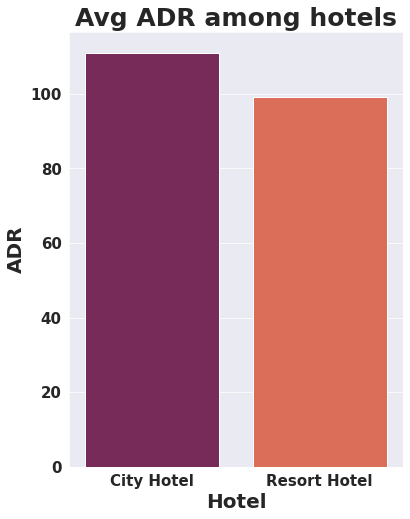

In [ ]:
#plot ADR of hotel
plt.figure(figsize=(6,8))
sns.barplot(x=Highest_ADR['hotel'],y=Highest_ADR['adr'],palette='rocket')
plt.xlabel('Hotel')
plt.ylabel('ADR')
plt.title('Avg ADR among hotels');

## Inference

*   City hotels has the slightly highest ADR that means city hotels are genrating more revenue as compared to resort hotels.


## 19) Which hotel has the more lead time?

In [ ]:
#check the mean lead time 
avg_lead_time = group_by_hotel['lead_time'].mean().reset_index()
avg_lead_time

hotel  lead_time
0    City Hotel  77.678521
1  Resort Hotel  83.371938

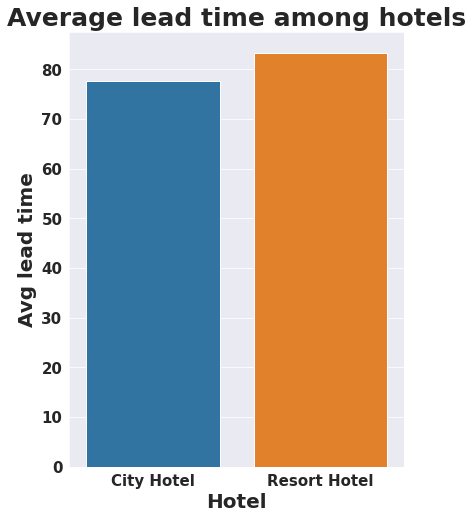

In [ ]:
#Plot lead time average by hotel type
plt.figure(figsize=(6,8))
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
plt.xlabel('Hotel')
plt.ylabel('Avg lead time')
plt.title('Average lead time among hotels');

## Inference


*   Resort hotels has slightly high average lead time that means customer plans trip early than city hotels.



## 20) Which distribution channel has contributed more to adr in order to increase the revenue?

In [ ]:
# group by distribution channel and hotel
dcf=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
dcf

distribution_channel         hotel         adr
0            Corporate    City Hotel   83.265884
1            Corporate  Resort Hotel   52.972522
2               Direct    City Hotel  112.092246
3               Direct  Resort Hotel  106.523946
4                  GDS    City Hotel  120.317845
5                TA/TO    City Hotel  112.426347
6                TA/TO  Resort Hotel  101.553533
7            Undefined    City Hotel   29.625000
8            Undefined  Resort Hotel  112.700000

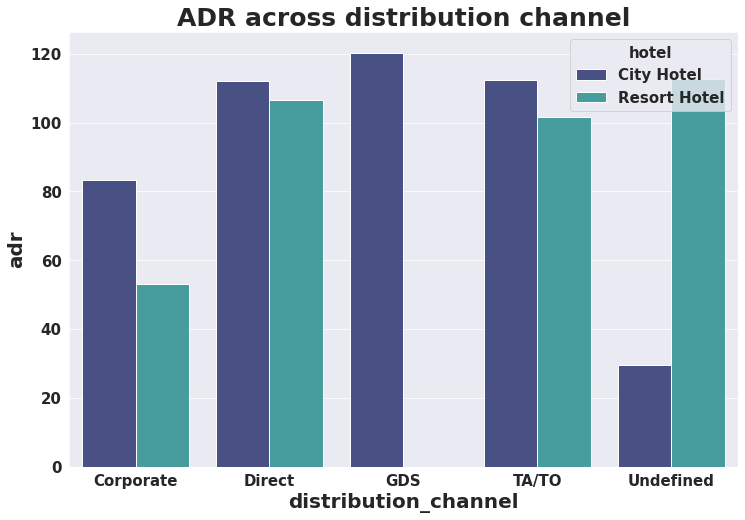

In [ ]:
#plot which distribution channel has contributed more in revenue
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel', y='adr', data=dcf, hue='hotel',palette='mako')
plt.title('ADR across distribution channel');

 

*   Corporate- These are corporate hotel booking companies which makes bookings possible.
*   GDS-GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
*  Direct- means that bookings are directly made with the respective hotels.
*  TA/TO- means that booings are made through travel agents or travel operators.
Undefined- Bookings are undefined. may be customers made their bookings on arrival.





## Inference

*  'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels.
*   GDS has highly contributed in adr in 'City Hotel' type.
* GDS contrbuting 0 in resort hotel bookings.

## 21) Which distribution channel has the higest cancellation rate?

In [ ]:
#create cancelled df
canceled_df=df[df['is_canceled']==1] 

#group by distribution channel and hotel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
canceled_df


distribution_channel         hotel  Counts
0            Corporate    City Hotel     332
1            Corporate  Resort Hotel     316
2               Direct    City Hotel     973
3               Direct  Resort Hotel     952
4                  GDS    City Hotel      36
5                TA/TO    City Hotel   14704
6                TA/TO  Resort Hotel    6708
7            Undefined    City Hotel       4

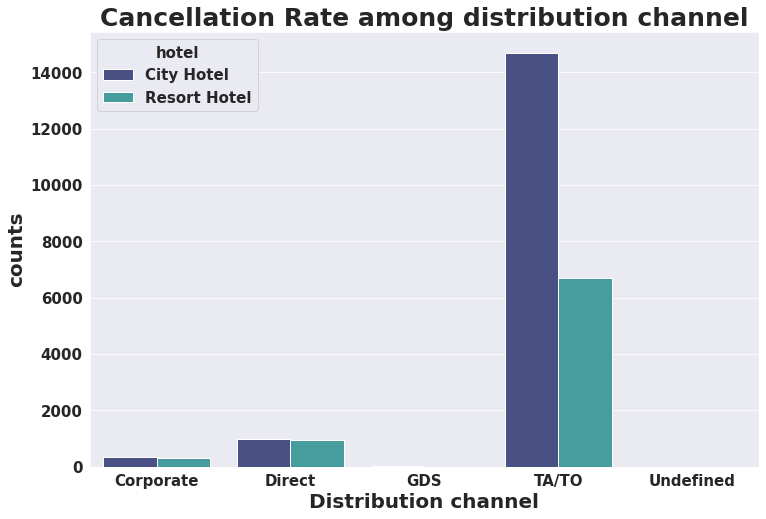

In [ ]:
#plot Cancellation rate among distribution channel
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df,palette='mako')

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate among distribution channel');

## Inference

*   It seem that TA/TO has the highest cancellation rate among distribution channel and more cancellation are for city hotels.


## 22) Which Market Segment has the higest cancellation rate?


In [ ]:
#create dataframe for market segments where booking were cancelled
market_segment_df=df[df['is_canceled']==1]   

#gropu by market segment and hotel
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

market_segment         hotel  counts
0        Aviation    City Hotel      45
1   Complementary    City Hotel      57
2   Complementary  Resort Hotel      31
3       Corporate    City Hotel     264
4       Corporate  Resort Hotel     246
5          Direct    City Hotel     912
6          Direct  Resort Hotel     825
7          Groups    City Hotel     890
8          Groups  Resort Hotel     445
9   Offline TA/TO    City Hotel    1261
10  Offline TA/TO  Resort Hotel     802
11      Online TA    City Hotel   12618
12      Online TA  Resort Hotel    5627
13      Undefined    City Hotel       2

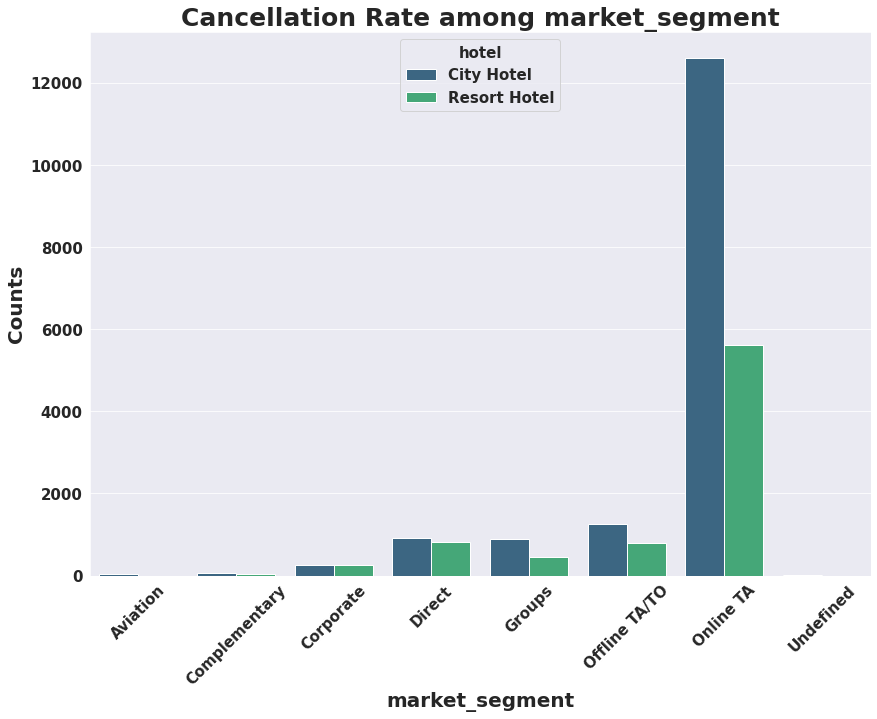

In [ ]:
#plot Cancellation rate among market segments
plt.figure(figsize=(14,10))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate among market_segment');

## Inference


*   Online T/A has the highest cancellation rate and more cancellation for city hotels.


## 23)What is the Optimal stay length in both types of hotels ?

In [ ]:
#group by total stay and hotel
grouped_stay = df.groupby(['total_stay', 'hotel']).agg('count').reset_index() 
#take 1st 3 columns  
grouped_stay = grouped_stay.iloc[:, :3]                                            
grouped_stay= grouped_stay.rename(columns={'is_canceled':'Number of stays'})
grouped_stay


total_stay         hotel  Number of stays
0            0    City Hotel              288
1            0  Resort Hotel              363
2            1    City Hotel            10284
3            1  Resort Hotel             6900
4            2    City Hotel            10824
..         ...           ...              ...
71          49    City Hotel                1
72          56  Resort Hotel                2
73          57    City Hotel                1
74          60  Resort Hotel                1
75          69  Resort Hotel                1

[76 rows x 3 columns]

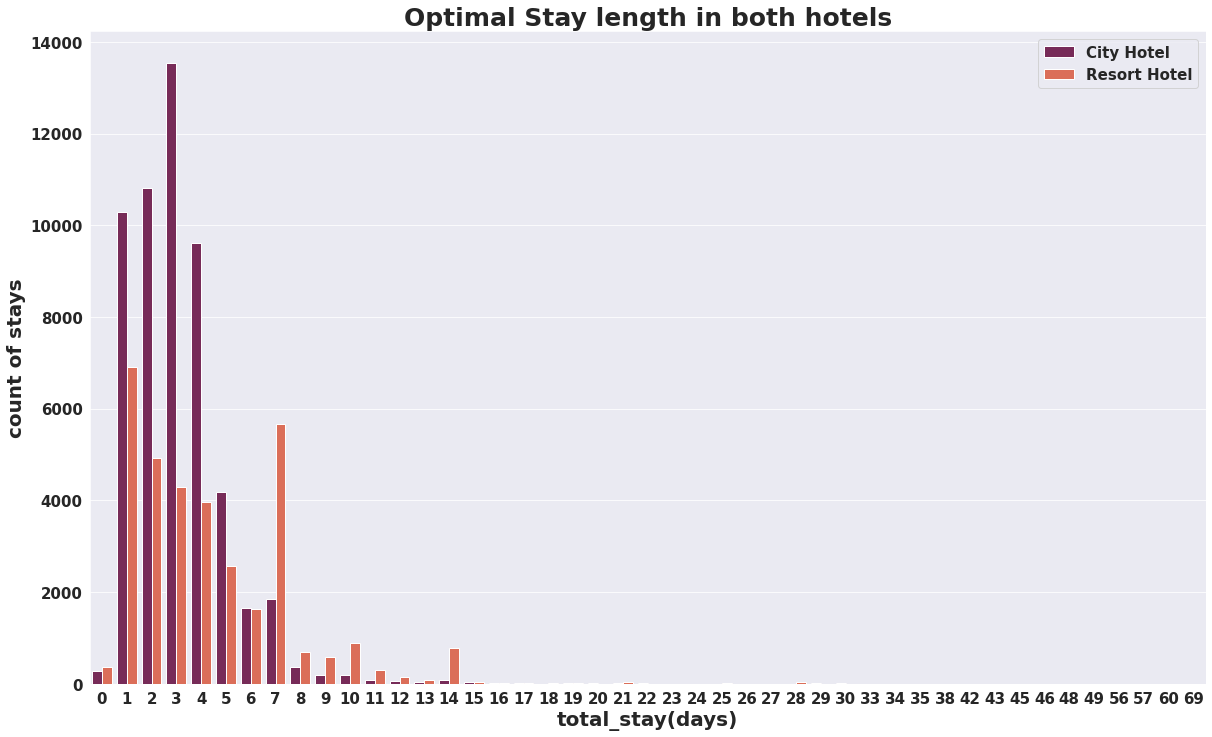

In [ ]:
#plot optimal stay length
plt.figure(figsize=(20,12))
sns.barplot(x='total_stay',y='Number of stays',data=grouped_stay,hue='hotel',palette='rocket')

plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')
plt.title('Optimal Stay length in both hotels')
plt.legend(loc='upper right');

## Inference

*   Optimal stay length in both hotels are less than 7 days.
*   On an average customer preferred to stay 1 to 4 days.


## 24) Relationship between ADR and total stay.

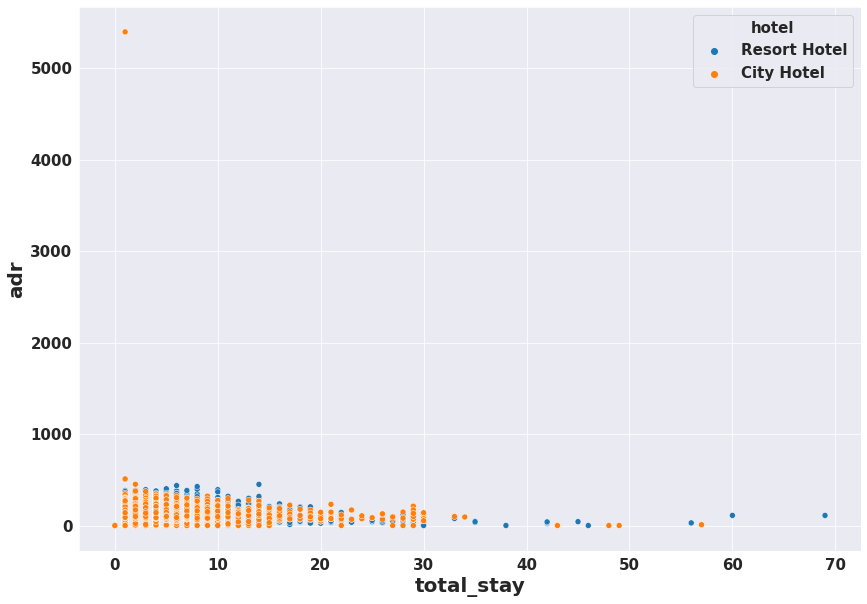

In [ ]:
#lets create scatter plot to see relationship between them.
plt.figure(figsize=(14,10))
sns.scatterplot(x=df['total_stay'],y=df['adr'],hue=df['hotel']);

In [ ]:
#we can see that because of an outlier our scatterplot is looking messy let's remove that outlier and plot again
df.drop(df[df['adr'] > 5000].index, inplace = True)

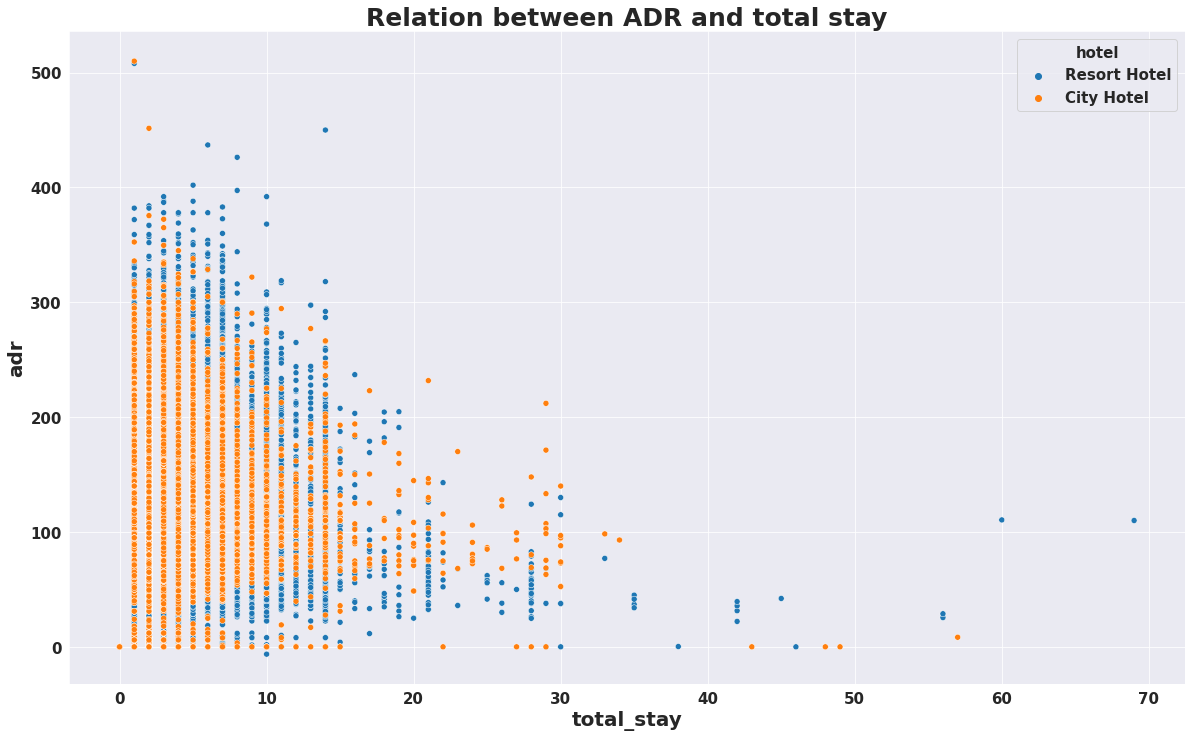

In [ ]:
#plot again
plt.figure(figsize=(20,12))
sns.scatterplot(x=df['total_stay'],y=df['adr'],hue=df['hotel'])
plt.title('Relation between ADR and total stay');

## Inference

*   As the number of total stay increasing adr is decreasing so we can say that more longer stay means better deal for guests.


## 25) What are the booking percentage acoording to number of peoples?

In [ ]:
#create a not cancelled dataframe
not_cancelled = df[df['is_canceled']==0]
#create three different dataframes for single, couple and family
single = not_cancelled[not_cancelled['total_people']==1]
couple = not_cancelled[not_cancelled['total_people']==2]
family_with_3_members = not_cancelled[not_cancelled['total_people']==3]
family_with_more_than_3 = not_cancelled[not_cancelled['total_people']>3]

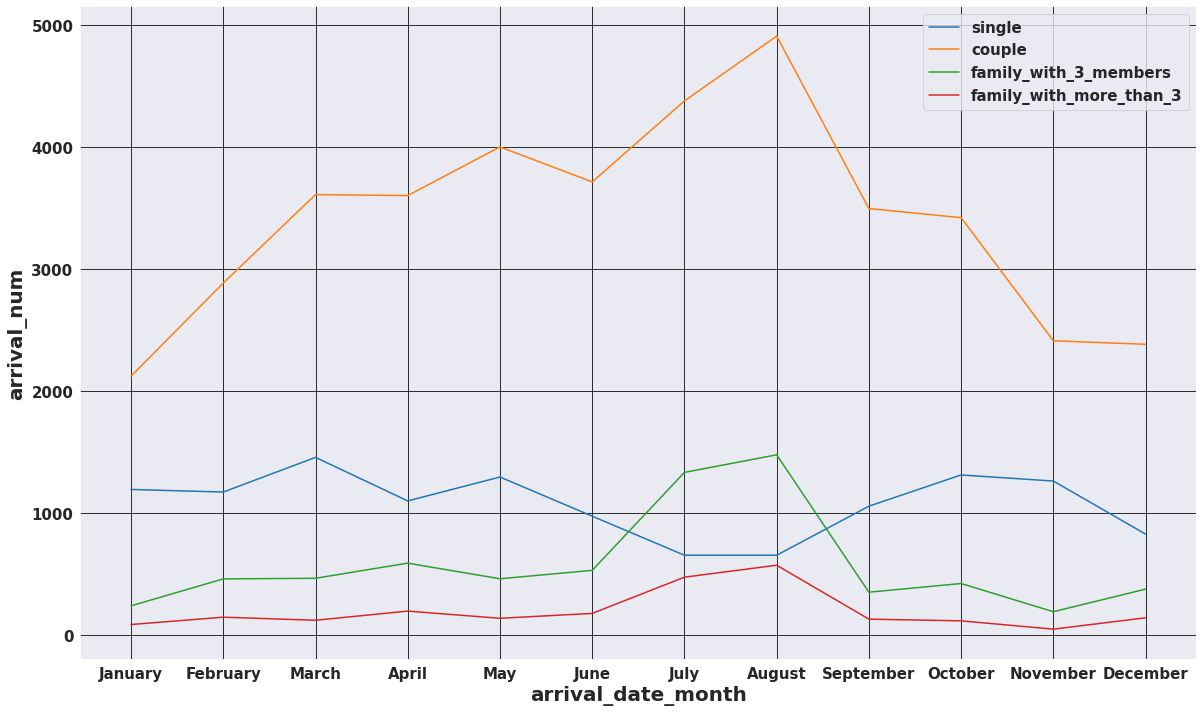

In [ ]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(20,12))
for type in ['single', 'couple', 'family_with_3_members','family_with_more_than_3']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type)
  plt.grid( b=True,color='black');

## Inference

*   It seems that most number of bookings were made by couples but we are not sure that they are couple as data dosen't have any specific about couple or family.
* We can also see that most number of bookings were in august month as we had seen in earlier analysis.
* surge in hotel booking were in months of june,july and august.
* Bookings with family having 4 member or above is least.


# **Conclusion:**


* City hotels are mostly preferred by guests they occupy 61.1 % of market share.
* Peak Months for hotel bookings were june, july and august. People preferred to spend more time in hotel during summer vacation and most numbers of bookings were in 2016.
* More than 82 % customer made no booking changes and 91.6 guests required no car parking space.
* Cancellation rate are high when bookings done through online TA/TO comapred to direct bookings.
* The number of repeated guests is too low (3.9%), thus retention rate is low.
* BB (Bed and Breakfast) is the most preferred meal type by the guest (more than 70%) .
* City hotels has highest ADR (Average Daily Rate),thus city hotels are generating more revenue and resort hotels have slightly higher lead time.
* The majority of guests come from western europe countries.
* Optimal stay length for both the hotels are for a week or less than week.



